In [4]:
import pandas as pd 
import sqlite3 

orders = pd.read_csv("orders.csv")
orders = orders.drop(columns=['restaurant_name'], errors="ignore")

users = pd.read_json("users.json")

rest = sqlite3.connect(":memory:")

with open("restaurants.sql", "r") as f:
    sql_script = f.read()

rest.executescript(sql_script)
restaurants = pd.read_sql(
    "SELECT * FROM restaurants",
    rest
)

orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)

final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)

print(final_df.head())
rest.close()

final_df.to_csv("final_food_delivery_dataset.csv", index=False)

   order_id  user_id  restaurant_id  order_date  total_amount       name  \
0         1     2508            450  18-02-2023        842.97  User_2508   
1         2     2693            309  18-01-2023        546.68  User_2693   
2         3     2084            107  15-07-2023        163.93  User_2084   
3         4      319            224  04-10-2023       1155.97   User_319   
4         5     1064            293  25-12-2023       1321.91  User_1064   

        city membership restaurant_name  cuisine  rating  
0  Hyderabad    Regular  Restaurant_450  Mexican     3.2  
1       Pune    Regular  Restaurant_309   Indian     4.5  
2    Chennai       Gold  Restaurant_107  Mexican     4.0  
3  Bangalore       Gold  Restaurant_224  Chinese     4.8  
4       Pune    Regular  Restaurant_293  Italian     3.0  


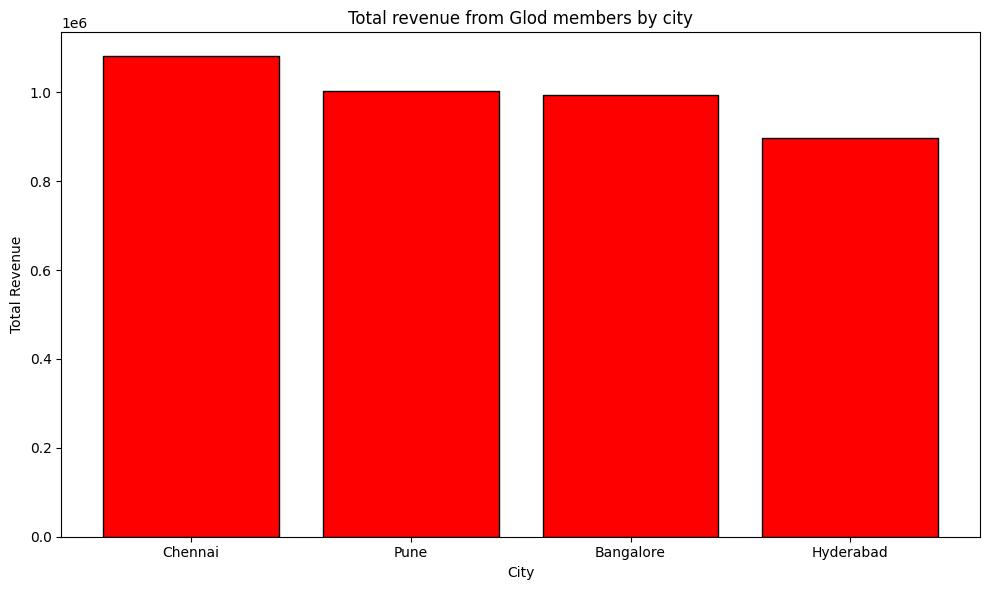

The cuisine with the highest average order value if : Mexican
Average Vlaue: 808.0213444401395


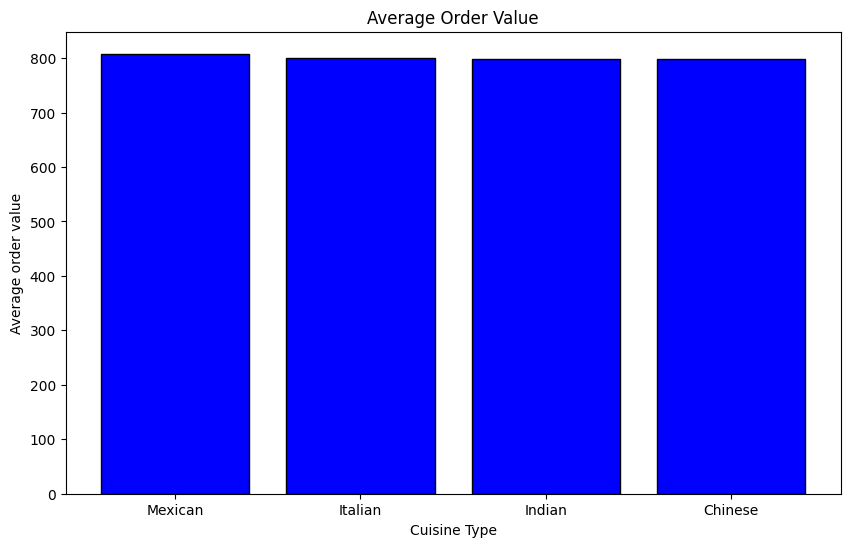

In [5]:
import matplotlib.pyplot as plt 

df = pd.read_csv("final_food_delivery_dataset.csv")
gold_df = df[df['membership']=='Gold']
city_revenue = gold_df.groupby("city")['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(city_revenue.index, city_revenue.values, color='red', edgecolor='black')

plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Total revenue from Glod members by city')

plt.tight_layout()
plt.show()


""" Que2>  """
cuisine_avg = df.groupby('cuisine')['total_amount'].mean().sort_values(ascending=False)

high_cuisine = cuisine_avg.idxmax()
high_avg_value = cuisine_avg.max()

print(f"The cuisine with the highest average order value if : {high_cuisine}")
print(f"Average Vlaue: {high_avg_value}")

plt.figure(figsize=(10,6))

bars = plt.bar(cuisine_avg.index, cuisine_avg.values, color="blue", edgecolor='black')
plt.xlabel('Cuisine Type')
plt.ylabel('Average order value')
plt.title('Average Order Value')

plt.tight_layout
plt.show()

In [6]:
total_spending = df.groupby("user_id")["total_amount"].sum()

high_spenders = total_spending[total_spending > 1000]

user_count = len(high_spenders)

print(f"Number of members spending over 1000rs :{user_count}")

Number of members spending over 1000rs :2544


C:\Users\priyanshu\AppData\Local\Temp\ipykernel_17096\53031096.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_revenue = df.groupby('rating_range') ['total_amount'].sum()


Hightest revenue generated by arange : 4.6-5.0


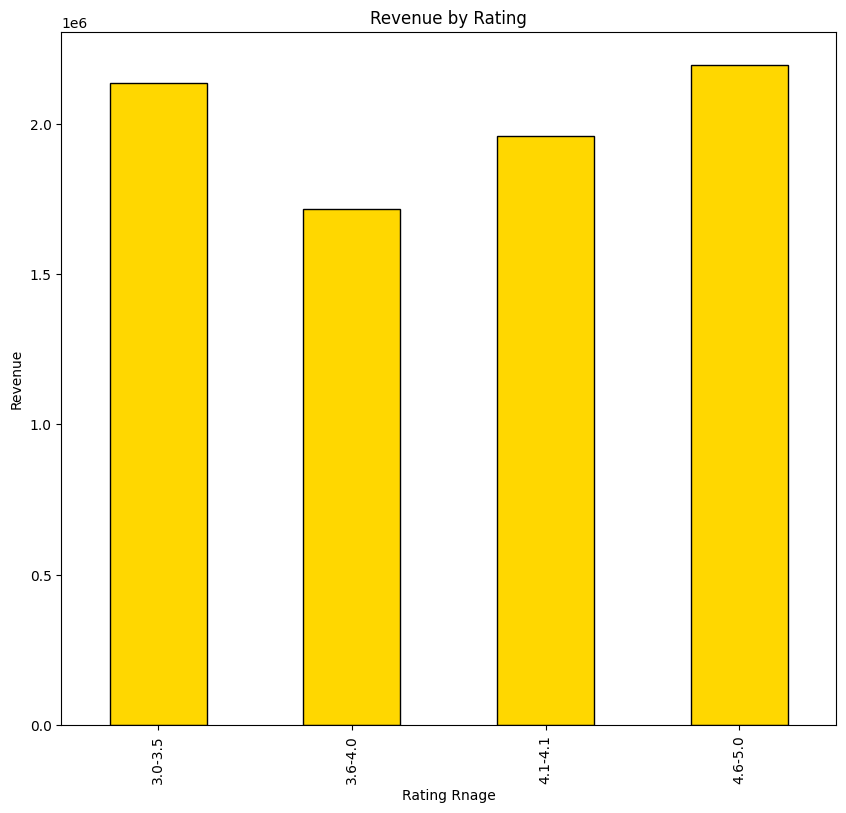

In [7]:
bins = [2.99,3.5,4.0,4.5,5.0]
labels = ['3.0-3.5', "3.6-4.0", '4.1-4.1', '4.6-5.0'] 

df['rating_range'] = pd.cut(df['rating'], bins = bins, labels = labels)

range_revenue = df.groupby('rating_range') ['total_amount'].sum()

high_range = range_revenue.idxmax()
print(f"Hightest revenue generated by arange : {high_range}")

plt.figure(figsize=(10,9))
range_revenue.plot(kind='bar', color='gold', edgecolor='black')
plt.xlabel("Rating Rnage")
plt.ylabel("Revenue")
plt.title("Revenue by Rating")
plt.tight_layout
plt.show()

In [8]:
gold_df = df[df['membership']=='Gold'] 
city_gold = gold_df.groupby("city")['total_amount'].mean().sort_values(ascending=False) 
high_avg_city = city_gold.idxmax() 
high_avg_value = city_gold.max() 

print(f"City with the highest avarage ordr value among Gold members is : {high_avg_city}") 
print(f"Average Order Value : {high_avg_value}")

City with the highest avarage ordr value among Gold members is : Chennai
Average Order Value : 808.4590800299178


In [9]:
count = df.groupby("cuisine")['restaurant_id'].nunique() 

revenue = df.groupby("cuisine")['total_amount'].sum() 
analysis = pd.DataFrame({'Restaurant Count': count, 'Total Revenue': revenue}) 
analysis['Revenue per Restaurant'] = analysis['Total Revenue'] / analysis['Restaurant Count'] 

print(analysis.sort_values(by='Restaurant Count'))

         Restaurant Count  Total Revenue  Revenue per Restaurant
cuisine                                                         
Chinese               120     1930504.65            16087.538750
Indian                126     1971412.58            15646.131587
Italian               126     2024203.80            16065.109524
Mexican               128     2085503.09            16292.992891


In [10]:
total_orders = len(df) 
gold_orders = len(df[df['membership'] == 'Gold']) 

percentage_gold = (gold_orders / total_orders) * 100 
result = round(percentage_gold) 

print(f"Percentage of orders by Gold members: {result}%")

Percentage of orders by Gold members: 50%


In [11]:
stats = df.groupby('restaurant_name')['total_amount'].agg(['count', 'mean']) 

filtered_res = stats[stats['count'] < 20] 

highest_avg_res = filtered_res['mean'].idxmax() 
highest_val = filtered_res['mean'].max() 
total_orders = filtered_res.loc[highest_avg_res, 'count'] 

print(f"The restaurant is: {highest_avg_res}") 
print(f"Average Order Value: ${highest_val:.2f}") 
print(f"Total Orders: {total_orders}")

The restaurant is: Restaurant_294
Average Order Value: $1040.22
Total Orders: 13


In [12]:
comb = df.groupby(['membership', 'cuisine'])['total_amount'].sum().reset_index()

options = [
    ('Gold','Indian'),
    ('Gold','Italian'),
    ('Regular','Indian'),
    ('Regular','Chinese')
]

for membership, cuisine in options: 
    revenue = comb[ 
        (comb['membership'] == membership) & 
        (comb['cuisine'] == cuisine) 
    ]['total_amount'].values[0] 
    print(f"{membership} + {cuisine} cuisine: ${revenue:,.2f}")

Gold + Indian cuisine: $979,312.31
Gold + Italian cuisine: $1,005,779.05
Regular + Indian cuisine: $992,100.27
Regular + Chinese cuisine: $952,790.91


In [13]:
df ['order_date'] = pd.to_datetime(df['order_date'])

df['quarter'] = df['order_date'].dt.quarter
revenue_quarter = df.groupby('quarter') ['total_amount'].sum()

labels = {
    1: 'Q1(Jan_mar)',
    2: 'Q2(Apr_June)',
    3: 'Q3(July_Sept)',
    4: 'Q4(Oct_Dec)',
    }

revenue_quarter.index = revenue_quarter.index.map(labels)

high_quater = revenue_quarter.idxmax()
print(revenue_quarter)

quarter
Q1(Jan_mar)      2010626.64
Q2(Apr_June)     1945348.72
Q3(July_Sept)    2037385.10
Q4(Oct_Dec)      2018263.66
Name: total_amount, dtype: float64


C:\Users\priyanshu\AppData\Local\Temp\ipykernel_17096\55254426.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df ['order_date'] = pd.to_datetime(df['order_date'])


In [14]:
gold_mem_ord = df[df['membership']== 'Gold']
total_order= len(gold_mem_ord)
print(total_order)

4987


In [15]:
orders = df[df['city'] == 'Hyderabad']

hyd_rev = orders['total_amount'].sum()

result = round(hyd_rev)
print(result)

1889367


In [16]:
users = df['user_id'].nunique()

print(users)

2883


In [17]:
gld_mem = df[df['membership'] == 'Gold']

avg_value = gld_mem['total_amount'].mean()

result = round(avg_value,2)
print(result)

797.15


In [18]:
rated_res = df[df['rating'] >= 4.5]
total_orders = len(rated_res)

print(total_orders)

3374


In [19]:
goldd_df = df[df['membership'] == 'Gold']
revenue = goldd_df.groupby('city')['total_amount'].sum()

top_city = revenue.idxmax()
order_count = goldd_df[goldd_df['city'] == top_city].shape[0]

print(f"Top revenue city for Gold Member is : {top_city} with {order_count} order")

Top revenue city for Gold Member is : Chennai with 1337 order
